In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
trees = pd.read_csv("train.csv")

In [3]:
trees.shape

(15120, 56)

In [4]:
trees.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

### Check for Anomalies & Outliers

In [6]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [7]:
# loop through all columns to see if there are any outliers
for column in trees.columns:
    if outlier_function(trees, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(trees, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [8]:
trees = trees[(trees['Horizontal_Distance_To_Fire_Points'] > outlier_function(trees, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (trees['Horizontal_Distance_To_Fire_Points'] < outlier_function(trees, 'Horizontal_Distance_To_Fire_Points')[1])]
trees.shape

(14988, 56)

### 2. Exploratory Data Analysis

In [9]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in trees.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(trees[is_binary_columns].values.ravel())

array([1, 0], dtype=int64)

In [10]:
# sum of all widerness area columns
trees["w_sum"] = trees["Wilderness_Area1"] + trees["Wilderness_Area2"] + trees["Wilderness_Area3"] + trees["Wilderness_Area4"]
print(trees.w_sum.value_counts())

1    14988
Name: w_sum, dtype: int64


In [11]:
# create a list of soil_type columns
soil_columns = [c for c in trees.columns if "Soil" in c]
trees["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    trees["soil_sum"] += trees[c]

print(trees.soil_sum.value_counts())

1    14988
Name: soil_sum, dtype: int64


In [12]:
trees.Cover_Type.value_counts()

7    2160
6    2160
4    2160
3    2160
5    2135
1    2119
2    2094
Name: Cover_Type, dtype: int64

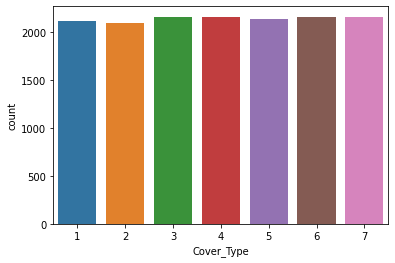

In [13]:
sns.countplot(trees.Cover_Type)
plt.show()

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

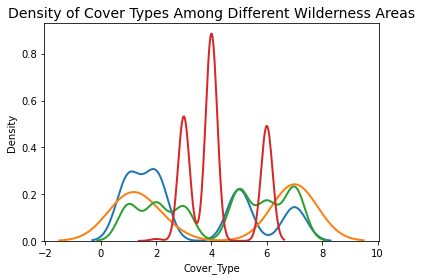

In [14]:

trees['Wilderness_Area_Type'] = (trees.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(trees['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
# figsize(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = trees[trees['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

### Reverse One Hot Encoding

In [15]:
trees.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [16]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [17]:
# reverse_one_hot_encode(trees, 12, 15, "Wilderness_Area")

In [18]:
reverse_one_hot_encode(trees, 16, 56, "Soil_Type")

In [19]:
# store continious variables in a list
continuous_variables = trees.columns[1:11].tolist()

In [20]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_cleaned = trees[all_features_w_label]

In [21]:
trees_cleaned.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,Cover_Type
11,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0,30,2
14,2503,157,4,67,4,674,224,240,151,5600,1,0,0,0,18,5
15,2495,51,7,42,2,752,224,225,137,5576,1,0,0,0,16,5
17,2517,72,7,85,6,595,228,227,133,5607,1,0,0,0,18,5
18,2504,0,4,95,5,691,214,232,156,5572,1,0,0,0,18,5


<AxesSubplot:>

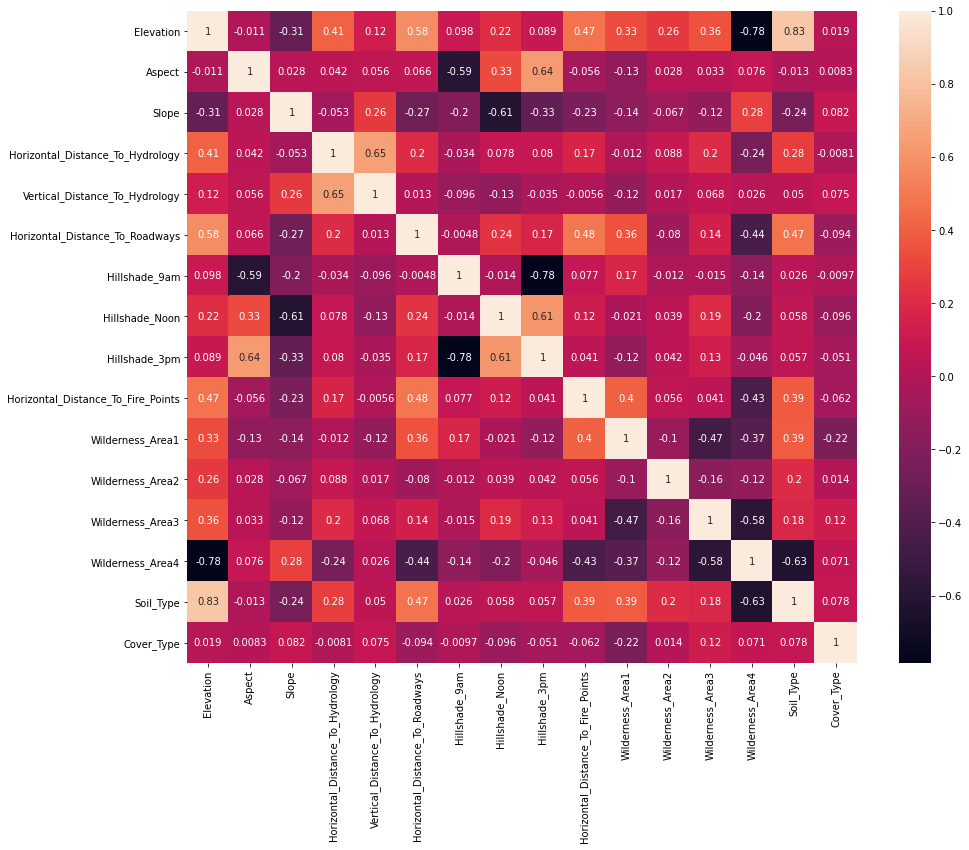

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(trees_cleaned.corr(), annot=True)

In [23]:
corr_matrix = abs(trees_cleaned.corr())
print(corr_matrix["Cover_Type"].sort_values(ascending=False))

Cover_Type                            1.000000
Wilderness_Area1                      0.220713
Wilderness_Area3                      0.116628
Hillshade_Noon                        0.095848
Horizontal_Distance_To_Roadways       0.094212
Slope                                 0.081715
Soil_Type                             0.078400
Vertical_Distance_To_Hydrology        0.074566
Wilderness_Area4                      0.071171
Horizontal_Distance_To_Fire_Points    0.062142
Hillshade_3pm                         0.051264
Elevation                             0.019360
Wilderness_Area2                      0.013653
Hillshade_9am                         0.009710
Aspect                                0.008252
Horizontal_Distance_To_Hydrology      0.008078
Name: Cover_Type, dtype: float64


## Split The Data For Model

In [24]:
X = trees_cleaned.drop("Cover_Type",axis=1)
y = trees_cleaned["Cover_Type"].as_matrix()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1)

In [26]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Data Shape: (11990, 15)
Validation Data Shape: (2998, 15)
Training Label Shape: (11990,)
Validation Label Shape: (2998,)


In [27]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [30]:
# create model apply fit_evaluate_model
from lightgbm import LGBMClassifier
lgbm_classifier = LGBMClassifier()
lgbm_accuracy = fit_evaluate_model(lgbm_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", lgbm_accuracy)

Number of correct predictions made out of all predictions are: 0.8495663775850567


In [31]:
y_train

array([2, 4, 1, ..., 3, 2, 3], dtype=int64)

In [32]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type
1053,2861,159,7,124,11,2967,228,242,146,2588,1,0,0,0,29
12702,2133,339,7,0,0,1328,204,230,164,674,0,0,0,1,4
10389,3225,47,13,408,17,2813,224,212,120,1061,0,0,1,0,22
10288,3364,358,16,658,172,830,193,208,151,626,0,1,0,0,33
14979,2650,159,25,272,126,2190,237,235,113,875,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,2943,169,1,60,-2,5460,220,239,156,2147,1,0,0,0,23
5299,2498,144,17,513,245,927,241,235,117,713,0,0,0,1,2
12304,2207,331,22,277,167,319,164,207,180,811,0,0,0,1,10
312,2861,0,6,134,10,2980,211,228,155,3972,1,0,0,0,30


In [44]:
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type'],
      dtype='object')

In [45]:
def predict(Elev,Aspe,Slope,H_Hydrology,V_Hydrology,Roadways,hill9,hillnoon,hill3,firept,area,soil):
    area_index = np.where(X.columns==area)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = Elev
    x[1] = Aspe
    x[2] = Slope
    x[3]= H_Hydrology
    x[4] = V_Hydrology
    x[5] = Roadways
    x[6] = hill9
    x[7] = hillnoon
    x[8] = hill3
    x[9] = firept
    x[10] = soil
    
    if area_index >= 0:
        x[area_index]= 1
    
    scaled = scaler.transform([x])
        
    return lgbm_classifier.predict(scaled)[0].round(2)
   

In [54]:
result = predict(2861,159,20,124,11,2967,228,242,146,2588,'Wilderness_Area3',40)
if result == 1 :
    print('Cover By Spruce/Fir Trees')
elif result == 2:
    print('Cover By Lodgepole Pine Trees')
elif result == 3:
    print('Cover By Ponderosa Pine Trees')
elif result == 4:
    print('Cover By Cottonwood/Willow Trees')
elif result ==5:
    print('Cover By Aspen Trees')
elif result==6:
    print('Cover By Douglas-fir Trees')
elif result == 8:
    print('Cover By KrummholzTrees')

Cover By Ponderosa Pine Trees


In [48]:
a = [2861,159,7,124,11,2967,228,242,146,2588,1,0,0,0,29]
# transform validation set
scaled = scaler.transform([a])
pred = lgbm_classifier.predict(scaled)
pred

array([3], dtype=int64)